<a href="https://colab.research.google.com/github/hajihye123/MachineLearning_Lecture/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_6%EC%9D%BC%EC%B0%A8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# K-평균
from sklearn.datasets import make_blobs

In [7]:
# 예제 데이터 생성
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [8]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

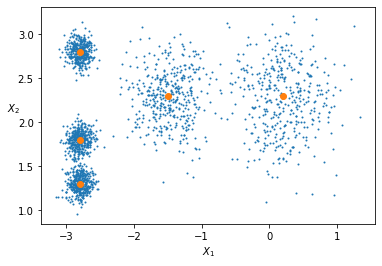

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=None, s=1)
plt.scatter(blob_centers[:, 0], blob_centers[:, 1], c=None)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$", rotation=0)
plt.show()

In [14]:
from sklearn.cluster import KMeans
import time

start = time.time()
kmeans = KMeans(n_clusters=5, random_state=42) # 각 샘플은 5개의 클러스터 중 하나에 할당됨 
y_pred = kmeans.fit_predict(X)
end = time.time()
end - start

0.0606842041015625

In [15]:
kmeans.cluster_centers_ # 5개의 센트로이드(클러스터 중심)

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

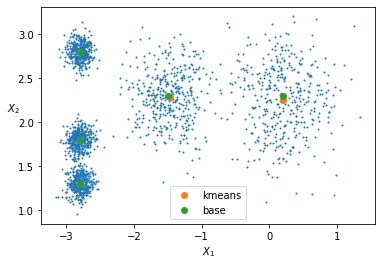

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=None, s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=None, label='kmeans')
plt.scatter(blob_centers[:, 0], blob_centers[:, 1], c=None, label='base')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$", rotation=0)
plt.legend()
plt.show()

In [17]:
X_new = np.array([[0, 2]])
kmeans.predict(X_new)

array([0], dtype=int32)

In [18]:
kmeans.inertia_

211.5985372581684

In [19]:
kmeans = KMeans(n_clusters=5, random_state=15, n_init=5)
kmeans.fit_predict(X)
kmeans.inertia_

211.5985372581684

In [20]:
kmeans.predict(X_new)

array([2], dtype=int32)

In [21]:
kmeans.transform(X_new)

array([[2.88633901, 1.49439034, 0.32995317, 2.9042344 , 2.81093633]])

In [24]:
# 미니배치 K-평균
from sklearn.cluster import MiniBatchKMeans

start = time.time()
minibatch = MiniBatchKMeans(n_clusters=5)
minibatch.fit_predict(X)
end = time.time()
end - start

0.054308414459228516

In [25]:
minibatch.inertia_

212.0365336332938

In [26]:
kmeans.inertia_

211.5985372581684

In [27]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

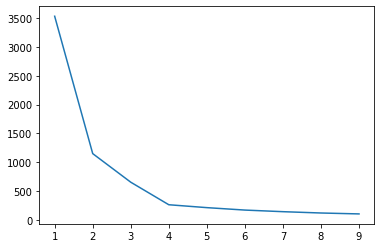

In [28]:
plt.plot(range(1, 10), inertias)

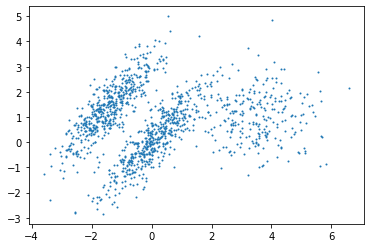

In [29]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.scatter(X[:, 0], X[:, 1], c=None, s=1)
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

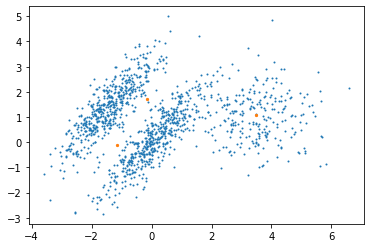

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=None, s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=None, s=5)
plt.show()